In [391]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from scipy.spatial import distance
from sklearn.feature_selection import RFE
from scipy.spatial.distance import mahalanobis
import seaborn as sns

In [392]:
new_data4 = pd.read_csv('cleaned_dataset.csv')

In [393]:
new_data4.head()

,Unique ID,Country IDs,Country Names,Age,Industry,Years of Experience,Job Title,Education,Knows English,Number of Connections,Endorsements,Profile Picture,Volunteer Experience,WFH,Company Type,Company Size,YOE in Current Company,Received Promotion,Number of People Under,Salary
0,1.0,5.0,Australia,23.0,Manufacturing,3.0,Software Engineer,Bachelor,1.0,515.0,31.0,0.0,0.0,0.0,Private,10000.0,1.0,1,0.0,122070.20
1,2.0,1.0,USA,35.0,Retail,7.0,Doctor,Bachelor,1.0,4.0,0.0,0.0,1.0,0.0,Private,10.0,3.0,0,0.0,69986.76
2,3.0,4.0,Canada,32.0,Finance,22.0,Business Analyst,PhD,1.0,203.0,10.0,0.0,0.0,0.0,Public,100.0,12.0,0,0.0,131893.80
3,4.0,4.0,Canada,28.0,Tech,10.0,Marketing Associate,Bachelor,1.0,89.0,5.0,1.0,0.0,1.0,Non-profit,100.0,7.0,0,0.0,83108.47
4,5.0,4.0,Canada,31.0,Education,20.0,Professor,Bachelor,1.0,45.0,1.0,1.0,1.0,1.0,Non-profit,10000.0,17.0,0,37.0,117729.30


In [394]:
columns_to_drop = ['Unique ID', 'Country IDs']
new_data4.drop(columns=columns_to_drop, inplace=True)

In [395]:
new_data4 = new_data4.dropna()

In [396]:
new_data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Names           2000 non-null   object 
 1   Age                     2000 non-null   float64
 2   Industry                2000 non-null   object 
 3   Years of Experience     2000 non-null   float64
 4   Job Title               2000 non-null   object 
 5   Education               2000 non-null   object 
 6   Knows English           2000 non-null   float64
 7   Number of Connections   2000 non-null   float64
 8   Endorsements            2000 non-null   float64
 9   Profile Picture         2000 non-null   float64
 10  Volunteer Experience    2000 non-null   float64
 11  WFH                     2000 non-null   float64
 12  Company Type            2000 non-null   object 
 13  Company Size            2000 non-null   float64
 14  YOE in Current Company  2000 non-null   

In [397]:
encoder  = ce.TargetEncoder(cols=['Country Names', 'Industry', 'Job Title', 'Education', 'Company Type'])

In [398]:
new_data_encoded = encoder.fit_transform(new_data4, new_data4['Salary'])

In [399]:
new_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Names           2000 non-null   float64
 1   Age                     2000 non-null   float64
 2   Industry                2000 non-null   float64
 3   Years of Experience     2000 non-null   float64
 4   Job Title               2000 non-null   float64
 5   Education               2000 non-null   float64
 6   Knows English           2000 non-null   float64
 7   Number of Connections   2000 non-null   float64
 8   Endorsements            2000 non-null   float64
 9   Profile Picture         2000 non-null   float64
 10  Volunteer Experience    2000 non-null   float64
 11  WFH                     2000 non-null   float64
 12  Company Type            2000 non-null   float64
 13  Company Size            2000 non-null   float64
 14  YOE in Current Company  2000 non-null   

In [400]:
data = new_data_encoded.drop('Salary', axis=1).values
mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=False)

In [401]:
mahalanobis_dist = [distance.mahalanobis(point, mean, np.linalg.inv(cov)) for point in data]

In [407]:
X = new_data_encoded.drop(['Salary'], axis=1)
mean = X.mean()
cov = X.cov()
distances = []
for i, row in X.iterrows():
    distances.append(mahalanobis(row, mean, np.linalg.inv(cov)))
threshold = 2.0 * np.std(distances)
outliers = []
for i, d in enumerate(distances):
    if d > threshold:
        outliers.append(i)
                     

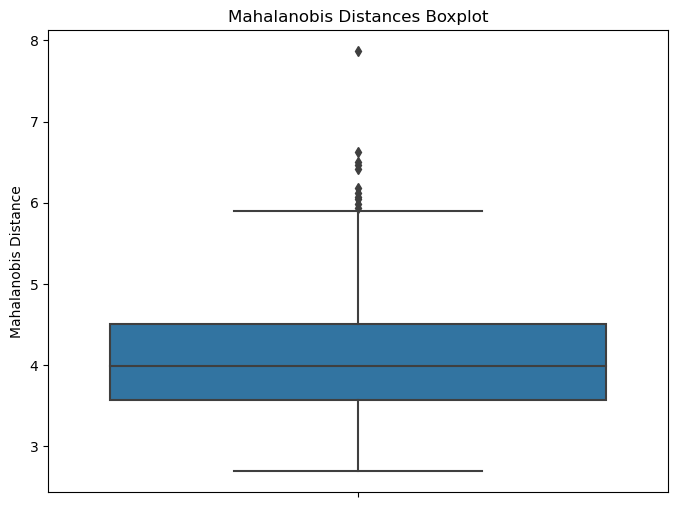

In [408]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Distances')
plt.title('Mahalanobis Distances Boxplot')
plt.ylabel('Mahalanobis Distance')
plt.show()

In [433]:
outliers_data = data.iloc[outliers]

print("Outliers:", outliers)
print("Variable names of outliers:")
print(outliers_data)

Outliers: [2, 4, 5, 6, 7, 8, 9]
Variable names of outliers:
          0         1         2
2  0.437587  0.891773  0.963663
4  0.568045  0.925597  0.071036
5  0.087129  0.020218  0.832620
6  0.778157  0.870012  0.978618
7  0.799159  0.461479  0.780529
8  0.118274  0.639921  0.143353
9  0.944669  0.521848  0.414662


In [435]:

columns_to_remove = [2, 4, 5, 8, 9]


new_data_filtered = new_data_encoded.drop(new_data_encoded.columns[columns_to_remove], axis=1)


In [436]:
new_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Names           2000 non-null   float64
 1   Age                     2000 non-null   float64
 2   Years of Experience     2000 non-null   float64
 3   Knows English           2000 non-null   float64
 4   Number of Connections   2000 non-null   float64
 5   Volunteer Experience    2000 non-null   float64
 6   WFH                     2000 non-null   float64
 7   Company Type            2000 non-null   float64
 8   Company Size            2000 non-null   float64
 9   YOE in Current Company  2000 non-null   float64
 10  Received Promotion      2000 non-null   int64  
 11  Number of People Under  2000 non-null   float64
 12  Salary                  2000 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 203.3 KB


In [437]:
X = new_data_filtered.drop("Salary", axis=1)
y = new_data_filtered["Salary"]

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [439]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [440]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [441]:
def calculate_rmse(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [442]:
rmse_random_forest = calculate_rmse(random_forest_model, X_test, y_test)
rmse_decision_tree = calculate_rmse(decision_tree_model, X_test, y_test)

In [443]:
print("Random Forest RMSE:", rmse_random_forest)
print("Decision Tree RMSE:", rmse_decision_tree)

Random Forest RMSE: 27969.696352574643
Decision Tree RMSE: 41954.451224227734


In [461]:
test_rmse_1 = np.sqrt(rmse_random_forest)
print("Random Forest rmse:",test_rmse_1)

Random Forest rmse: 167.24143132781018


In [460]:
test_rmse_2 = np.sqrt(rmse_decision_tree)
print("Decision Tree rmse:",test_rmse_2)

Decision Tree rmse: 204.82785753951472


In [446]:
feature_importances = random_forest_model.feature_importances_

In [447]:
feature_names = X.columns

In [448]:
sorted_idx = feature_importances.argsort()[::-1]

In [452]:
top_n = 8

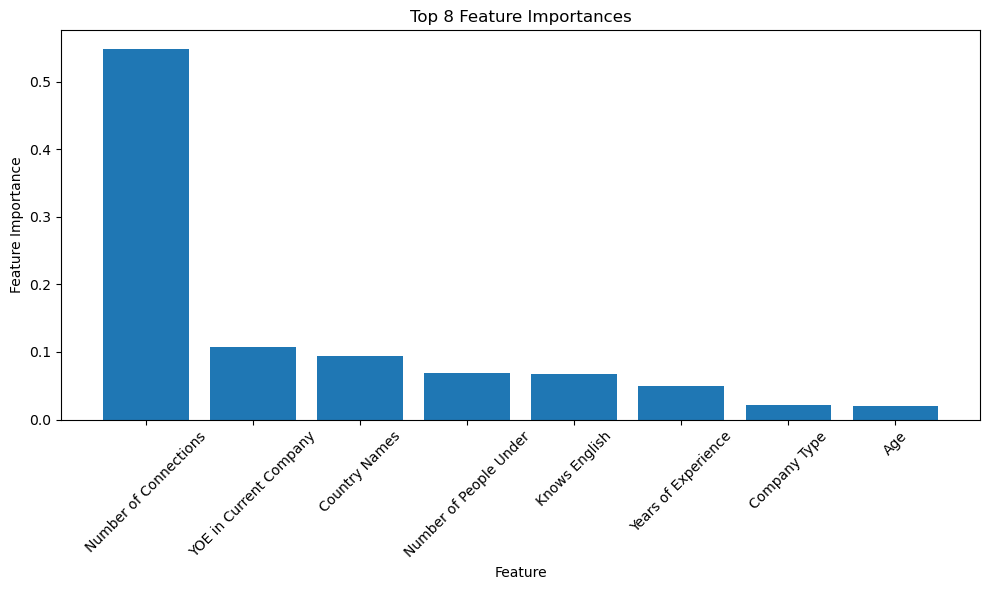

In [453]:
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(top_n))
plt.bar(range(top_n), feature_importances[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][:top_n], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()

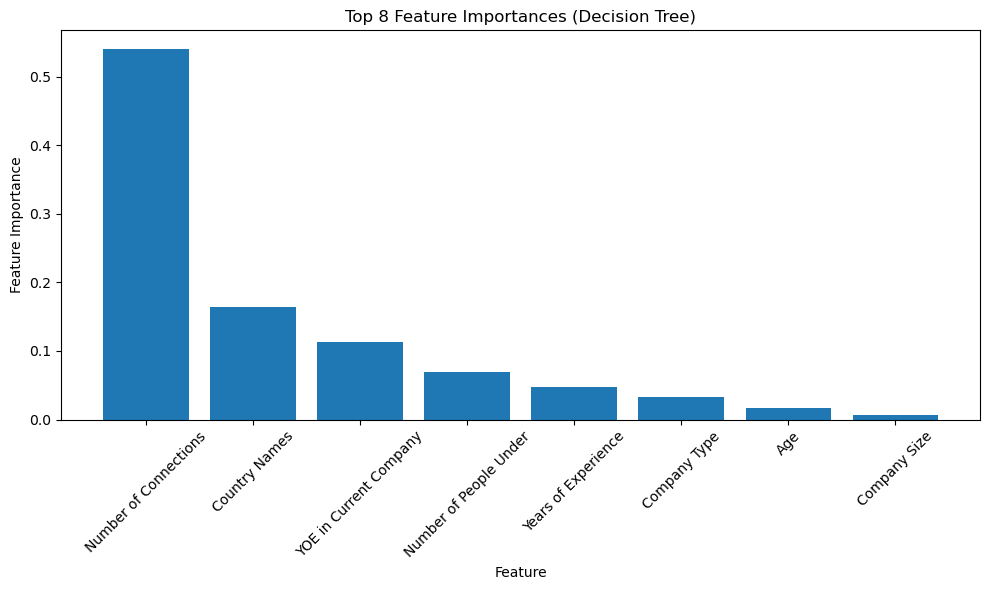

In [455]:

decision_tree_importances = decision_tree_model.feature_importances_


feature_names = X.columns


sorted_idx = decision_tree_importances.argsort()[::-1]


top_n = 8


plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances (Decision Tree)".format(top_n))
plt.bar(range(top_n), decision_tree_importances[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][:top_n], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()

In [462]:
y_pred_rf = random_forest_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

In [463]:
num_features = X_train.shape[1]

In [464]:
adj_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - num_features - 1)

In [465]:
y_pred_dt = decision_tree_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)

In [466]:
adj_r2_dt = 1 - (1 - r2_dt) * (len(y_test) - 1) / (len(y_test) - num_features - 1)

In [467]:
print("Random Forest Model:")
print("R-squared: {:.4f}".format(r2_rf))
print("Adjusted R-squared: {:.4f}".format(adj_r2_rf))
print("\nDecision Tree Model:")
print("R-squared: {:.4f}".format(r2_dt))
print("Adjusted R-squared: {:.4f}".format(adj_r2_dt))

Random Forest Model:
R-squared: 0.8331
Adjusted R-squared: 0.8279

Decision Tree Model:
R-squared: 0.6245
Adjusted R-squared: 0.6128


In [468]:
better_model = "Random Forest" if adj_r2_rf > adj_r2_dt else "Decision Tree"
print("\nThe better performer is:", better_model)


The better performer is: Random Forest
